## Preamble and Datasets

In [1]:
def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_table('data/CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
    crime = crime.iloc[:,columns_to_keep].dropna()

    X_crime = crime.iloc[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('data/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7,
                           random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 1) Naive Bayes Classifiers.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train,X_test,y_train,y_test = train_test_split(X_C2, y_C2, random_state =0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf,X_train,X_test,y_train,y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

![gussian_naive_clf](gussian_naive_clf.png)

## Application to a real-world dataset.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_cancer, y_cancer,
                                                 random_state =0)
nbclf = GaussianNB().fit(X_train, y_train)
print('Breast Cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))


# 2) Random Forests.

![random_forest](random_forest.png)

![random_forest_process](random_forest_process.png)

Again, as the name would suggest this difference is accomplished by introducing random variation into the process of building each decision tree. This random variation during tree building happens in two ways:
- First, the data used to build each tree is selected randomly.
- second, the features chosen in each split tests are also randomly selected.

- To create a random forest model you first decide on how many trees to build. This is set using the `n_estimated` parameter for both RandomForestClassifier and RandomForestRegressor. Each tree were built from a different random sample of the data called the `bootstrap sample`. 

![bootstrap_samples](bootstrap_samples.png)

Bootstrap samples are commonly used in statistics and machine learning:
- If your training set has N instances or samples in total, a bootstrap sample of size N is created by just repeatedly picking one of the N dataset rows at random with replacement, that is, allowing for the possibility of picking the same row again at each selection.


- You repeat this random selection process N times. The resulting bootstrap sample has N rows just like the original training set but with possibly some rows from the original dataset missing and others occurring multiple times just due to the nature of the random selection with replacement.

- The number of features in the subset that are randomly considered at each stage is controlled by the `max_features` parameter.


- Once a random forest model is trained, it predicts the target value for new instances by first making a prediction for every tree in the random forest. For regression tasks the overall prediction is then typically the mean of the individual tree predictions. For classification the overall prediction is based on a weighted vote. Each tree gives a probability for each possible target class label then the probabilities for each class are averaged across all the trees and the class with the highest probability is the final predicted class.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

## Random forest: Fruit dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits,
                                                   y_fruits,
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

![f1](f1.png)
- Overall, you can get an impression of the increased complexity of this random forest model in capturing both the global and local patterns in the training data compared to the single decision tree model we saw earlier.

![f2](f2.png)
![f3](f3.png)
![f4](f4.png)
![f5](f5.png)
![f6](f6.png)

## Random Forests on a real-world dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

- If we didn't set the random state parameter, the model would likely be different each time due to the randomized nature of the random forest algorithm. So, on the positive side, random forest are widely used because they're very powerful.

# 3) Gradient Boosted Decision Trees.

<IPython.core.display.Javascript object>


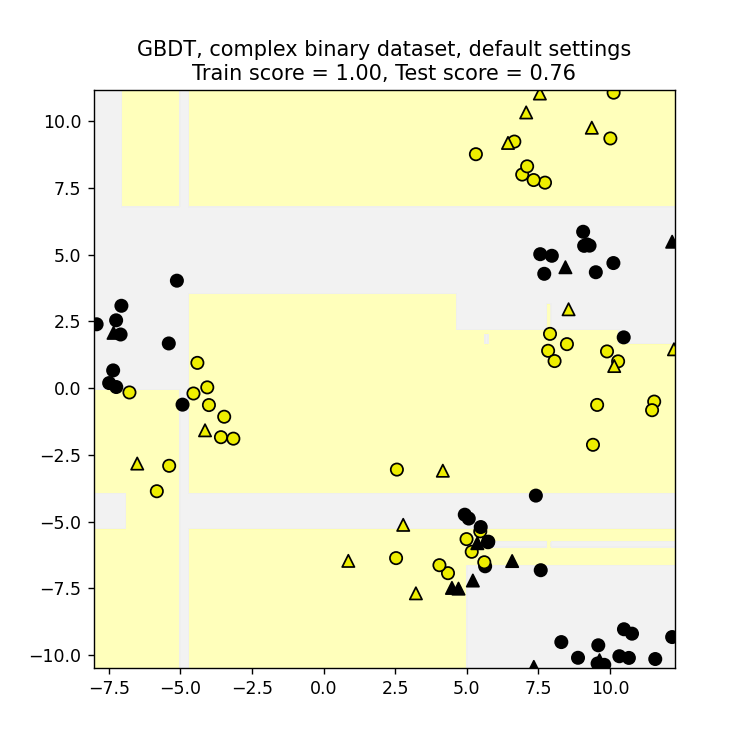

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show();

### Cancer dataset


In [9]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.97

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


Two ways to learn a less complex gradient boosted tree model are:
- to `reduce` the `learning rate`, so that each tree doesn't try as hard to learn a more complex model, that fixes the mistakes of its predecessor. 

- to `reduce` the `max_depth` parameter for the individual trees in the ensemble.

# 4) Neural Networks.

![MLP](MLP.png)

Here's an example of a simple neural network for regression, called a multi-layer perceptron. Which I will sometimes abbreviate by MLP. These are also known as feed-forward neural networks:

1. MLPs take this idea of computing weighted sums of the input features, like we saw in logistic regression. But it takes it a step beyond logistic regression, by adding an additional processing step called a hidden layer. Represented by this additional set of boxes, h0, h1, and h2 in the diagram. These boxes, within the hidden layer, are called hidden units. And each hidden unit in the hidden layer computes a nonlinear function of the weighted sums of the input features. Resulting in intermediate output values, v0, v1, v2.


2. Then the MLP computes a weighted sum of these hidden unit outputs, to form the final output value, Y hat.


3. This nonlinear function that the hidden unit applies. is called the activation function. In this example, your activation function is the hyperbolic tangent function, which is related to the logistic function. You can see that the result of adding this additional hidden layer processing step to the prediction model, is a formula for y hat. That is already more involved than the one for logistic regression. Now predicting y involves computing a different initial weighted sum of the input feature values for each hidden unit. Which applies a nonlinear activation function. And then all of these nonlinear outputs are combined, using another weighted sum, to produce y.


4. In particular, there's one weight between each input and each hidden unit. And one weight between each hidden unit and the output variable. In fact, this addition and combination of non-linear activation functions. Allows multi-layer perceptrons to learn more complex functions. Than is possible with a simple linear or logistic function. This additional expressive power enables neural networks to perform more accurate prediction. When the relationship between the input and output is itself complex.


5. Of course, this complexity also means that there are a lot more weights, model coefficients, to estimate in the training phase. Which means that both more training data and more computation are typically needed to learn in a neural network, compared to a linear model.

![activation_function](activation_function.png)

   - As an aside, there are a number of choices for the activation function in a neural network, that gets applied in hidden units. Here, the plot shows the input value coming into the activation function, from the previous layer's inputs on the x-axis. And the y-axis shows the resulting output value for the function. This code to plot this example is available in the accompanying notebook. The three main activation functions we'll compare later in this lecture are the hyperbolic tangent. That's the S-shaped function in green. The rectified linear unit function, which I'll abbreviate to relu, shown as the piecewise linear function in blue.

<IPython.core.display.Javascript object>


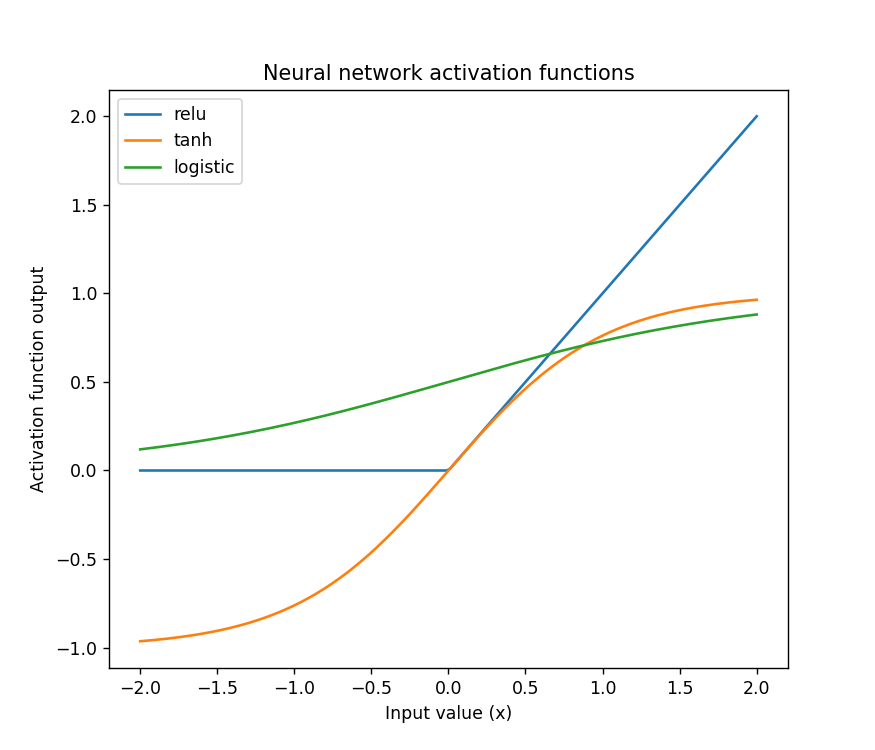

In [5]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

## Neural Network : Classification
### Synthetic dataset 1: `single` hidden layer.

<IPython.core.display.Javascript object>


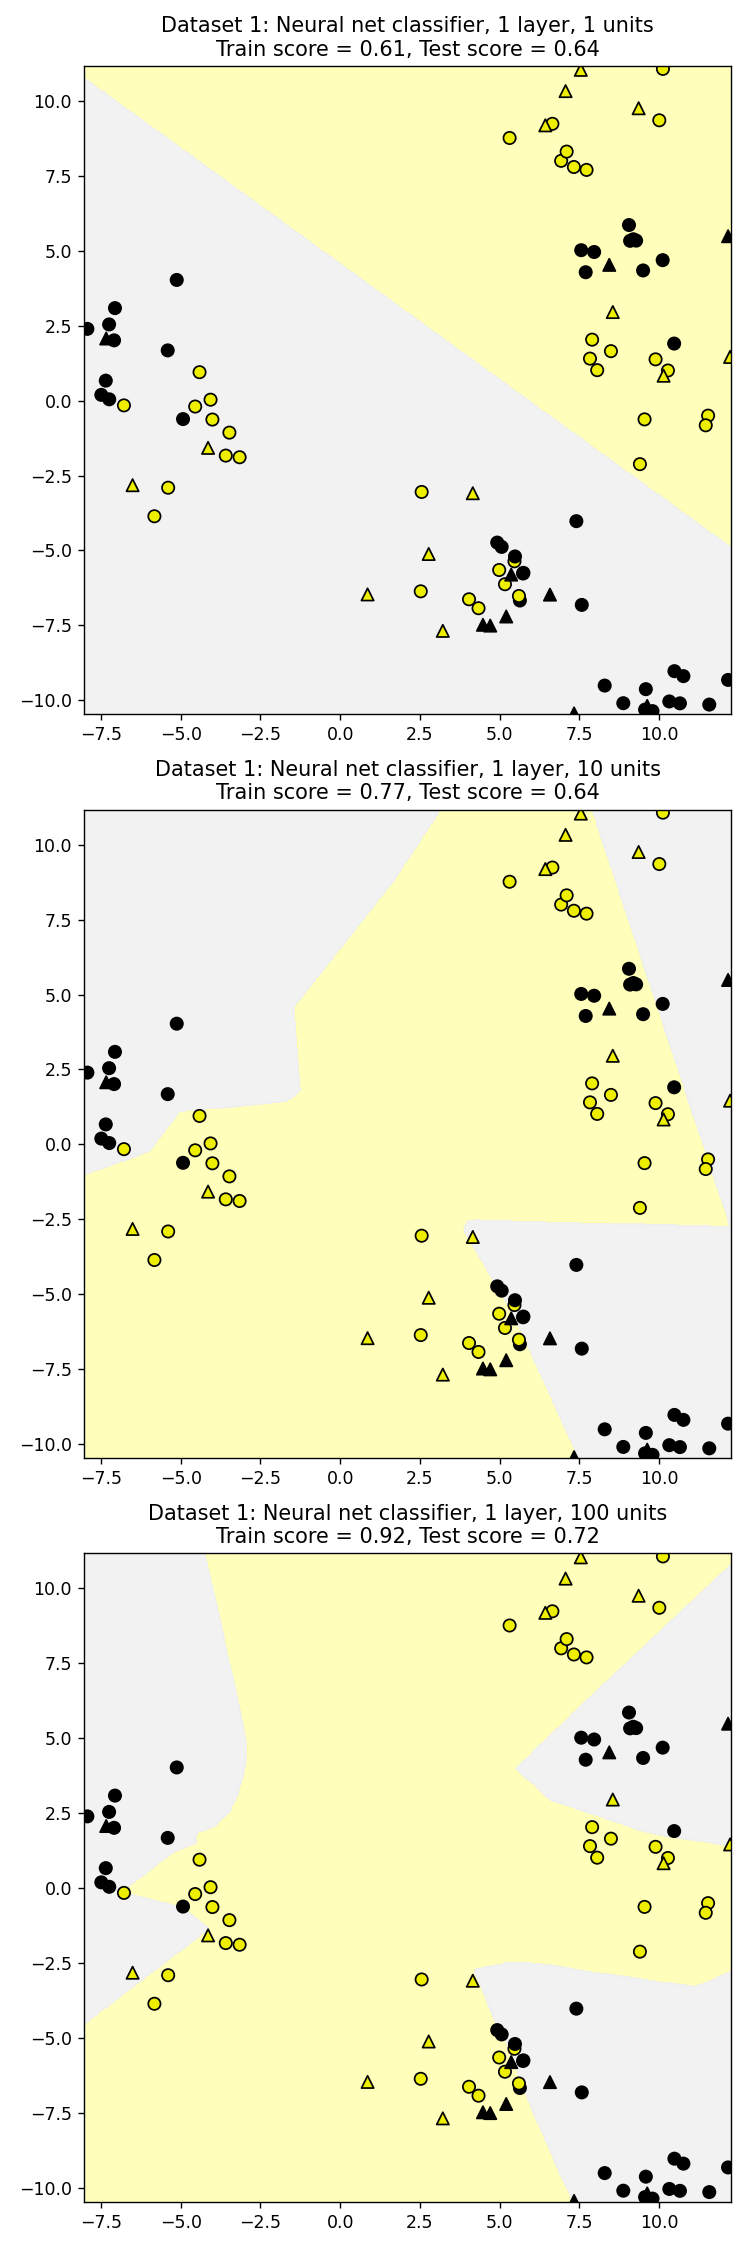

C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [8]:
from sklearn.neural_network import MLPClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train,X_test,y_train,y_test = train_test_split(X_D2,y_D2,random_state =0)

fig , subaxes = plt.subplots(3,1,figsize=(6,18))
for units , axis in zip([1,10,100] , subaxes ):
    nnclf = MLPClassifier(hidden_layer_sizes= [units] , solver='lbfgs',
                         random_state=0).fit(X_train,y_train)
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

### Synthetic dataset 1: `two` hidden layer.

![multi_layer_perceptron](multi_layer_perceptron.png)

<IPython.core.display.Javascript object>


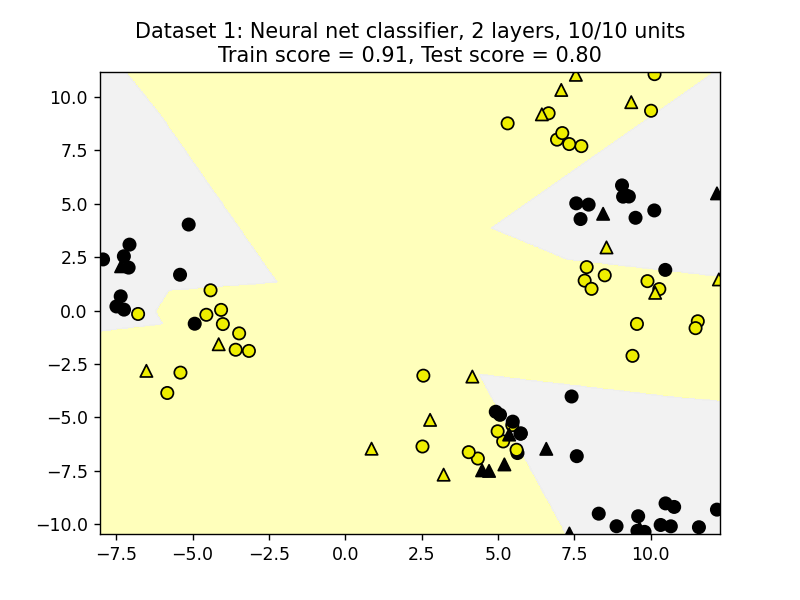

In [11]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

![one_vs_two_hidden_layer](one_vs_two_hidden_layer.png)

### Regularization Parameter : alpha.     [2_hidden Layers]

<IPython.core.display.Javascript object>


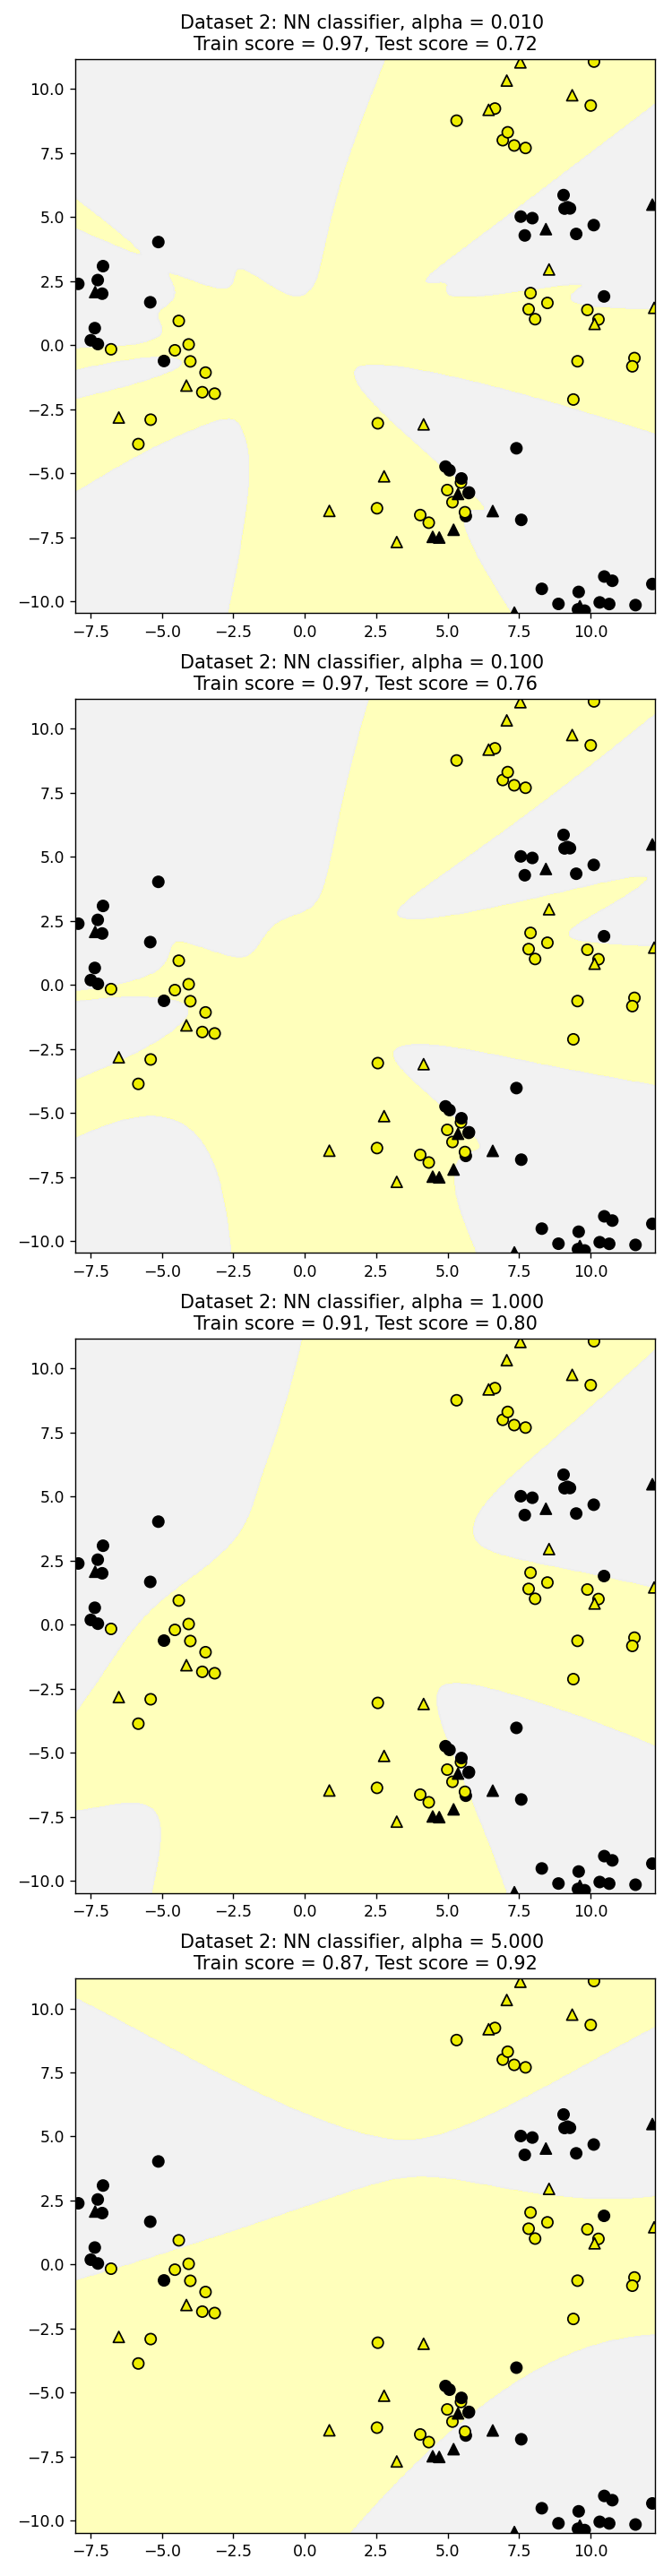

C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
S

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig , subaxes = plt.subplots(4, 1,figsize = (6,23))
for this_alpha , axis in zip([0.01 , 0.1 ,1 ,5],subaxes):
    nnclf = MLPClassifier(solver = 'lbfgs' , activation='tanh',
                          alpha = this_alpha,
                          hidden_layer_sizes = [100,100],
                          random_state=0).fit(X_train,y_train)
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

![regularization_effect](regularization_effect.png)

### The effect of different choices of `activation function`.

<IPython.core.display.Javascript object>


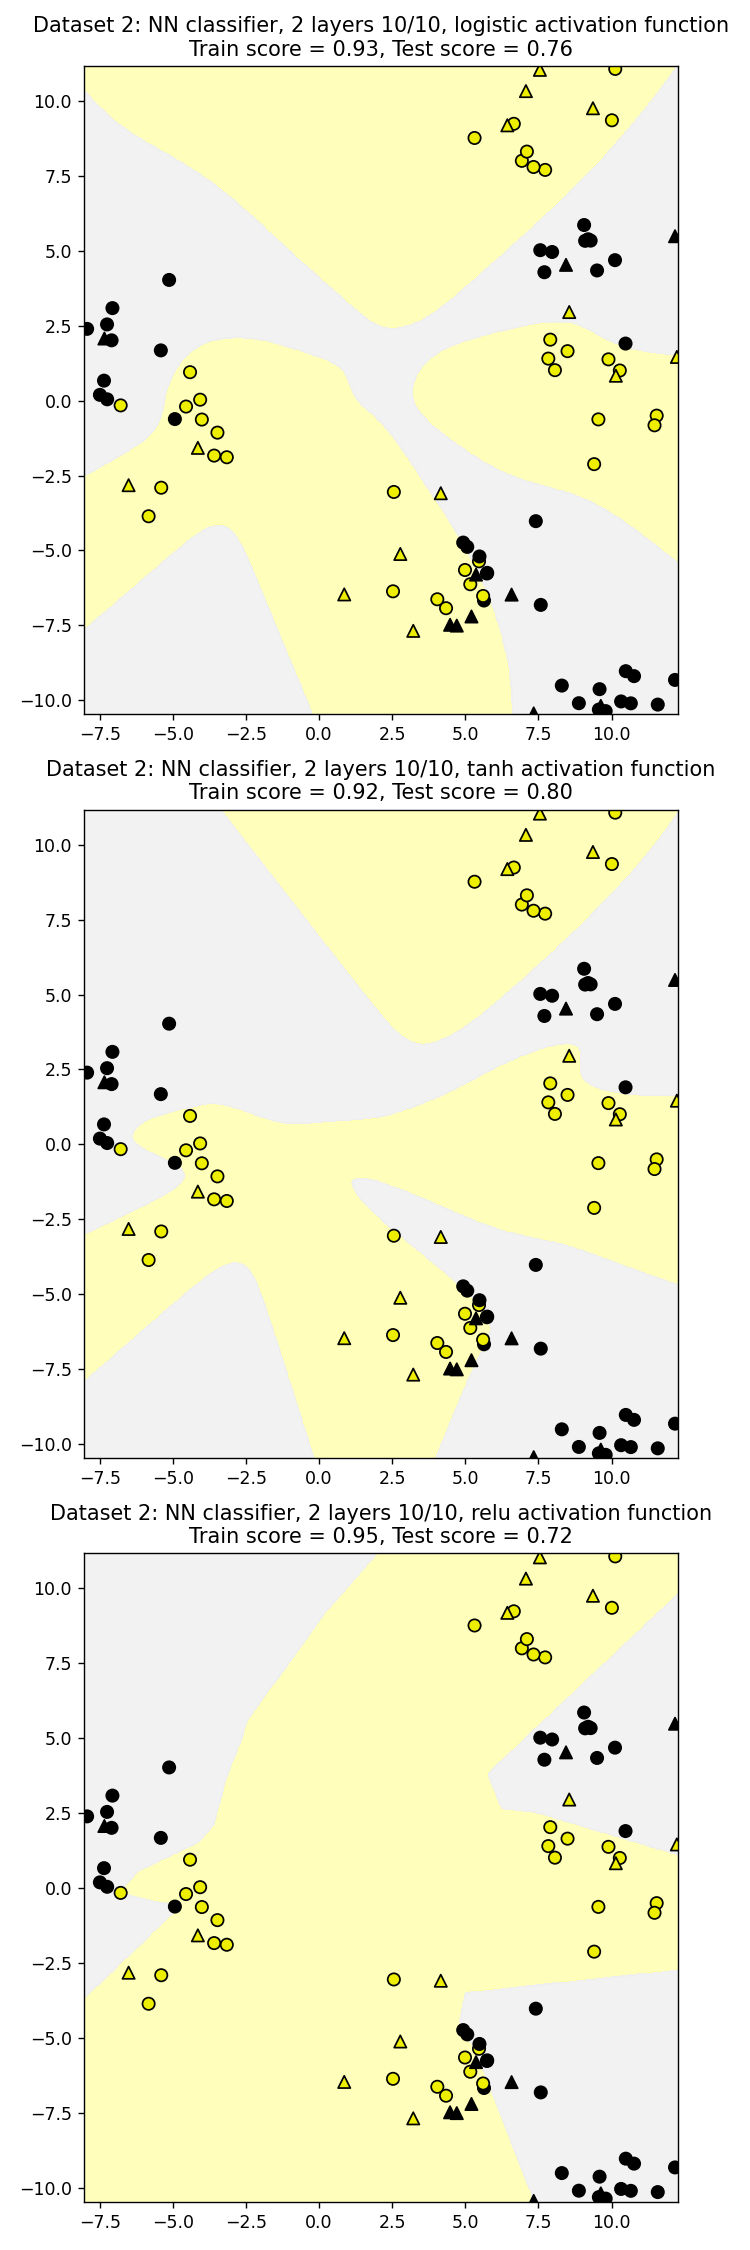

C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
S

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = this_activation,
                         alpha = 0.1, hidden_layer_sizes = [10, 10],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

### Application to `real world` dataset for Classification.
- It could be critical to properly `normalize` the input features,especially when using Neural Networks.

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,
                                                 random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nnclf = MLPClassifier(hidden_layer_sizes=[100,100],alpha=5,solver='lbfgs',
                     random_state=0).fit(X_train_scaled,y_train)
print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(nnclf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(nnclf.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.98
Accuracy of NN classifier on test set: 0.97


### Neural networks: Regression

<IPython.core.display.Javascript object>


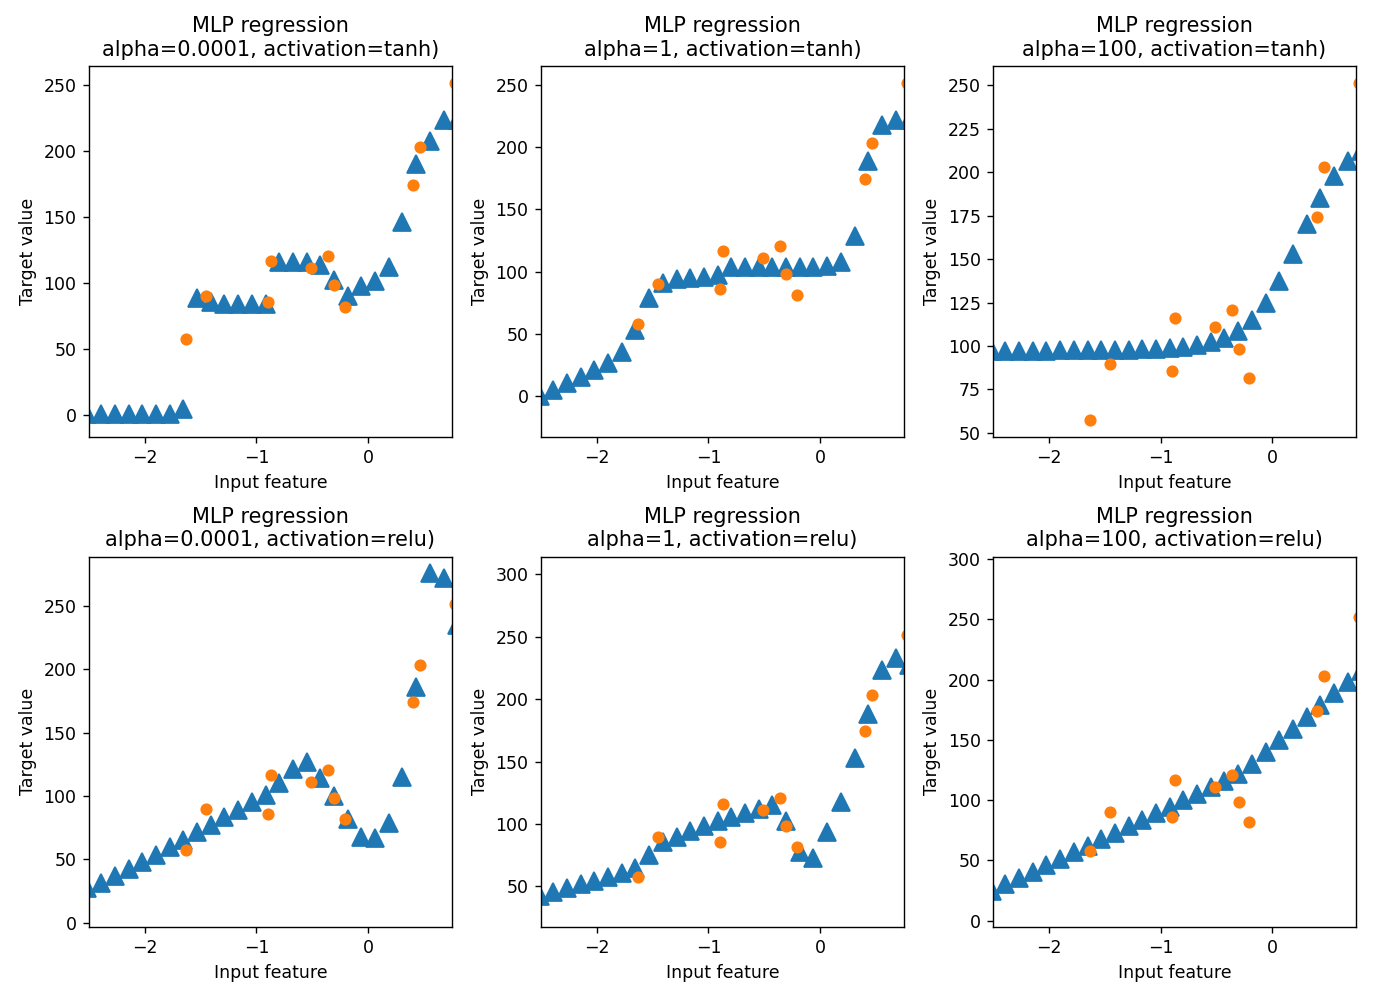

C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Assem Salama\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
S

In [16]:
from sklearn.neural_network import MLPRegressor
X_predict_input = np.linspace(-3,3,50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5],
                                                    random_state = 0)

fig , subaxes = plt.subplots(2,3,figsize = (11,8))
for thisaxisrow , thisactivation in zip(subaxes , ['tanh','relu']):
    for thisalpha , thisaxis in zip ([0.0001,1,100] , thisaxisrow):
        
        mlpreg = MLPRegressor(hidden_layer_sizes=[100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver='lbfgs').fit(X_train, y_train)
        
        y_predict_output = mlpreg.predict(X_predict_input)
        
        thisaxis.set_xlim([-2.5,0.75])
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

![mlp_reg](mlp_reg.png)
___________________
##  To sum up:
![NN_pros_cons](NN_pros_cons.png)
![NN_parameters](NN_parameters.png)
**Solver is the algorithm that actually does the numerical work of finding the optimal weights. And one intuitive way of visualizing this process. Is that all of the solver algorithms have to do a kind of hill-climbing in a very bumpy landscape, with lots of local minima:**
- Where each local minimum corresponds to a locally optimal set of weights. That is, a choice of weight setting that's better than any nearby choices of weights. So across this whole landscape of very bumpy local minima. Some will have higher validation scores on the test data, and some will have lower.


- So depending on the initial random initialization of the weights. And the nature of the trajectory in the search path that a solver takes through this bumpy landscape. The solver can end up at different local minima, which can have different validation scores.


- The default solver, `adam`, tends to be both efficient and effective on `large data sets`, with thousands of training examples.
- For `small data sets`, like many of the ones we use in these examples, the `lbfgs` solver tends to be faster, and find more effective weights. 

# 5) Deep Learning(Optional).

As we discussed in the first week of the course, one of the key challenges in machine learning is finding the right features to use as input to a learning model for a particular problem. This is called feature engineering and can be part art, and part science. It can also be the single most factor in doing well on a learning task. Sometimes, in fact, more often more important than the choice of the model itself:

- Because of the difficulty of feature engineering, there's been a lot of research on what's called feature learning or feature extraction algorithms that can find good features automatically. This brings us to `deep learning`.

![deep_learing](deep_learing.png)
![example](example.png)
![ex1](ex1.png)
![ex2](ex2.png)
![pros_cons](pros_cons.png)

# 6) Data Leakage.
![data_leakage](data_leakage.png)



**However, data leakage can happen for many other reasons too, often in ways that are quite subtle and hard to detect. When data leakage does occur, it typically causes results during your model development phase that are too optimistic, followed by the nasty surprise of disappointing results after the prediction model is actually deployed and evaluated on new data:**


- In other words, leakage can cause your system to learn a sub optimal model that does much worse in actual deployment than a model developed in a leak free setting. So leakage can have `dramatic implications in the real world ranging from the financial cost of making a bad monetary and engineering investment in something that doesn't actually work, to system failures that hurt customers perception of your system's quality or impact to the company's brand.`


![data_leakage_ex](data_leakage_ex.png)

### 1.
Suppose you are developing a retail website and building classifier to predict whether the user is likely to stay and view another page or leave the site. If the classifier predicts they're about to leave, the website might pop up something that offers incentives to continue shopping. An example of a feature that contains leaked information would be the `user's total session length` or `the total number of pages` they viewed during their visit to the site:

- This total is often added as a new column during the post-processing phase of the visit log data, for example. This feature has information about the future namely, how many more visits the user is going to make. That's impossible to know in an actual deployment.


- A solution is to replace the total session length feature with a page visit in-session feature that only knows the total pages visited so far in the session, and not how many are remaining.

### 2.
The second example of leakage might involve trying to predict if a customer on a bank's website was likely to open an account. If the user's record contains an account number field, it might normally be empty for users still on the process of exploring the site but eventually it's filled in once the user does open an account:
- Clearly the user account field is not a legitimate feature that should be used in this case, because it may not be available at the time the user is still exploring the site. 

### 3.
Another example of future information leaking in the past might be, if you are developing a diagnostic test to predict a particular medical condition. The existing patient data set might contain a binary variable that happens to mark whether or not the patient had surgery for that condition:

- Obviously, such a variable would be highly predictive of the medical condition. There are many other ways predictive information could leak into this feature set. There might be a certain combination of missing diagnosis codes that was very indicative of the medical condition. But again, these would not be legitimate to use since that information isn't available while a patient's condition is still being studied. 


- Finally, another example in the same patient is that it might involve the form of the patient ID. The ID might be assigned depending on a particular diagnosis path. In other words, the ID could be different if it's the result of a visit to a specialist, where the initial doctor determined that the medical condition was likely.

This last example is a great illustration of the fact that there are many different ways data leakage could occur in a training set and in fact, it's often the case that more than one leakage problem is present at once.  

## Sources:
![data_leakage_solu](data_leakage_solu.png)
## How to detecte ?:
![detect_dl](detect_dl.png)

## how to minimize Prob of occuring ?:
![minimize_dl](minimize_dl.png)

# Module 4 Quiz.

# 1
Which of the following is an example of clustering?
- Answer :  Separate the data into distinct groups by similarity

# 2 
Which of the following are advantages to using decision trees over other models? (Select all that apply)

Answer :  
- Trees are easy to interpret and visualize.
- Trees often require less preprocessing of data.

# 3
What is the main reason that each tree of a random forest only looks at a random subset of the features when building each node?
- Answer :  To improve generalization by reducing correlation among the trees and making the model more robust to bias.

# 4
Which of the following supervised machine learning methods are greatly affected by feature scaling? (Select all that apply)

Answer: 
- KNN
- Neural Networks
- Support vector machine

`KNN`

algorithm is seriously affected because you choose the K closest samples for your predictions. If one of the features has large values (e.g. ≈ 1000), and the other has small values (e.g. ≈1), your predictions will favor the feature with large values because the distance calculated will be dominated with it.

`SVM`

is affected because in the end you're trying to find a max-margin hyperplane separating the classes (or for making regressions). For example, if x1 and x2 are support vectors, we are interested in maximizing the distance between them, i.e. ||x1−x2||. Elements of these vectors are features. And, if we don't want some large features dominating the distance formulation, scaling is necessary.

`Decision Trees`

doesn't need it actually. Because, it just tries to find a threshold value for a given feature that best splits the samples. And, whether you scale it or not, a similar threshold will be chosen, since the ordinality of the variables doesn't change.

`Neural Networks`

are surely affected. One very obvious reason is their activation functions, e.g. sigmoid, tanh have very small derivatives when large values are involved, that can cause numerical difficulties also. The simplest of NN is logistic regression, where you again deal with linear boundaries as in SVM, by the way.

In `Naive Bayes`

, the critical formula affected by features is the (naive) likelihood P(x|Ci)=∏p(xj|Ci). The probability distribution of features is not affected by the scaling, since it is one-to-one, we'll have p(Xj=xj|Ci)=p(X′j=x′j|Ci) where apostrophe indicates scaled version of the variable. For example, in typical Bag of Words representation, you don't scale the features; on the contrary they've special meanings as the counts of each word.

# 5
Select which of the following statements are true.
Answer: 
- For predicting future sales of a clothing line, Linear regression would be a better choice than a decision tree regressor.
- For a model that won’t overfit a training set, Naive Bayes would be a better choice than a decision tree.

# 6
Match each of the prediction probabilities decision boundaries visualized below with the model that created them.
![Q1](Q1.png)

- answer:

1.Neural Networ

2.KNN(K=1)

3.Decision Tree

# 7
A decision tree of depth 2 is visualized below. Using the `value` attribute of each leaf, find the accuracy score for the tree of depth 2 and the accuracy score for a tree of depth 1. 
![Q2](Q2.png)
- Answer: 0.06745

# 8
For the autograded assignment in this module, you will create a classifier to predict whether a given blight ticket will be paid on time (See the module 4 assignment notebook for a more detailed description). Which of the following features should be removed from the training of the model to prevent data leakage? (Select all that apply)

Answer: 
- compliance_detail - More information on why each ticket was marked compliant or non-compliant.
- collection_status - Flag for payments in collections.

# 9
Which of the following might be good ways to help prevent a data leakage situation?
Answer: 
- If time is a factor, remove any data related to the event of interest that doesn’t take place prior to the event.
- Remove variables that a model in production wouldn’t have access to.
- Sanity check the model with an unseen validation set.

# 10
Given the neural network below, find the correct outputs for the given values of x1 and x2.

The neurons that are shaded have an activation threshold, e.g. the neuron with >1?  will be activated and output 1 if the input is greater than 1 and will output 0 otherwise.
![Q3](Q3.png)
Answer:

![A1](A1.png)
